,X,id,age,death,gender
,<int>,<int>,<int>,<int>,<int>
1,1,1,50,1,1
2,2,1,63,0,2
3,3,2,49,0,1
4,4,2,52,1,2
5,5,3,56,0,1
6,6,3,70,0,2


       X               id             age            death            gender   
 Min.   : 1.00   Min.   : 1.00   Min.   :49.00   Min.   :0.0000   Min.   :1.0  
 1st Qu.: 6.75   1st Qu.: 3.75   1st Qu.:62.50   1st Qu.:0.0000   1st Qu.:1.0  
 Median :12.50   Median : 6.50   Median :70.00   Median :0.0000   Median :1.5  
 Mean   :12.50   Mean   : 6.50   Mean   :67.54   Mean   :0.3333   Mean   :1.5  
 3rd Qu.:18.25   3rd Qu.: 9.25   3rd Qu.:74.00   3rd Qu.:1.0000   3rd Qu.:2.0  
 Max.   :24.00   Max.   :12.00   Max.   :81.00   Max.   :1.0000   Max.   :2.0  

[1] 24  5

'data.frame':	24 obs. of  5 variables:
 $ X     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id    : int  1 1 2 2 3 3 4 4 5 5 ...
 $ age   : int  50 63 49 52 56 70 68 75 74 72 ...
 $ death : int  1 0 0 1 0 0 1 1 0 1 ...
 $ gender: int  1 2 1 2 1 2 1 2 1 2 ...


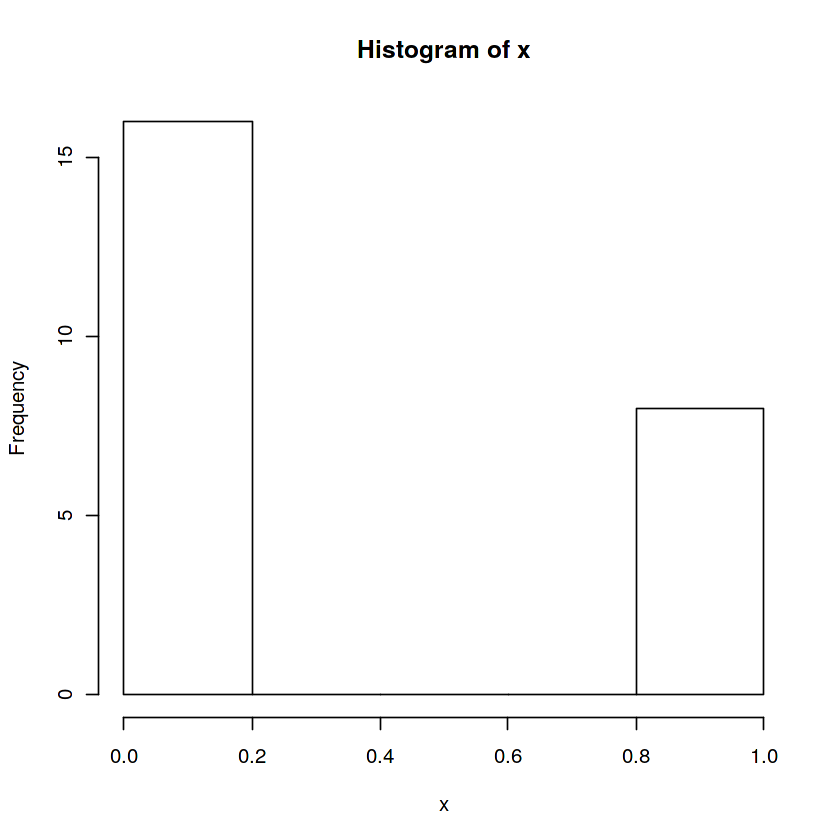

In [13]:
##Load Libraries

library(ggplot2)
library(tidyverse)
library(dplyr)
library(readr)
library(cowplot)
library(olsrr)
library(caret)
library(pscl)
library(lmtest)
library(ipred)
library(survival)
library(ResourceSelection)
library(survey)
library(lmtest)
library(pROC)
library(DescTools)

## NOTE: This is a proof of concept. Further validation work needs to take place.
##need to create train/datasets

data = read.csv('../input/twins-data/twins.csv', stringsAsFactors = F)
head(data) #allows you to check the data, first few entries 
summary(data) #produce result summaries of the results of various model fitting functions.
dim(data) #the dimension (e.g. the number of columns and rows) of a matrix, array or data frame. 
str(data) 
# this shows that we need to tell R which columns contain factors
# it will also show us if there are some missing values.
x<-data$death
hist(x)

In [14]:
#Baseline Accuracy
table(x)

x
 0  1 
16  8 

In [15]:
#CATOOLS
library(caTools)
set.seed(123)
split = sample.split(x, SplitRatio = 0.80) 

datatrain = subset(data, split==TRUE)
datatest = subset(data, split==FALSE)

head(datatrain)
head(datatest)

nrow(datatrain)#Training Samples
nrow(datatest) #Test Samples

,X,id,age,death,gender
,<int>,<int>,<int>,<int>,<int>
1,1,1,50,1,1
2,2,1,63,0,2
3,3,2,49,0,1
4,4,2,52,1,2
6,6,3,70,0,2
7,7,4,68,1,1


,X,id,age,death,gender
,<int>,<int>,<int>,<int>,<int>
5,5,3,56,0,1
10,10,5,72,1,2
18,18,9,74,0,2
22,22,11,58,1,2
24,24,12,73,0,2


[1] 19

[1] 5

In [16]:
#Logistic Regression Model
formula=death~age+gender
QualityLog = glm(formula , data=datatrain, family=binomial)
# replace x with the dependent variable 
# replace y with the independent variable(s)

summary(QualityLog)


Call:
glm(formula = formula, family = binomial, data = datatrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7463  -0.6878  -0.6704   0.8483   2.0232  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  6.90489    4.54574   1.519   0.1288  
age         -0.10599    0.06409  -1.654   0.0982 .
gender      -0.43194    1.12536  -0.384   0.7011  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23.699  on 18  degrees of freedom
Residual deviance: 20.113  on 16  degrees of freedom
AIC: 26.113

Number of Fisher Scoring iterations: 4


In [17]:
#Making predictions using the training set
predictTrain = predict(QualityLog, type="response")
summary(predictTrain)
predictTrain
y=datatrain$death

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07281 0.20126 0.21884 0.31579 0.34695 0.78234 

1          2          3          4          6          7          8 
0.76375180 0.34604404 0.78233942 0.62935173 0.20126334 0.32420935 0.12916335 
         9         11         12         13         14         15         16 
0.20254793 0.30143248 0.21884238 0.27959375 0.20126334 0.34785028 0.20126334 
        17         19         20         21         23 
0.20254793 0.10789856 0.07280848 0.50186231 0.18596618

In [18]:
tapply(predictTrain, y, mean)

0         1 
0.2541393 0.4493648

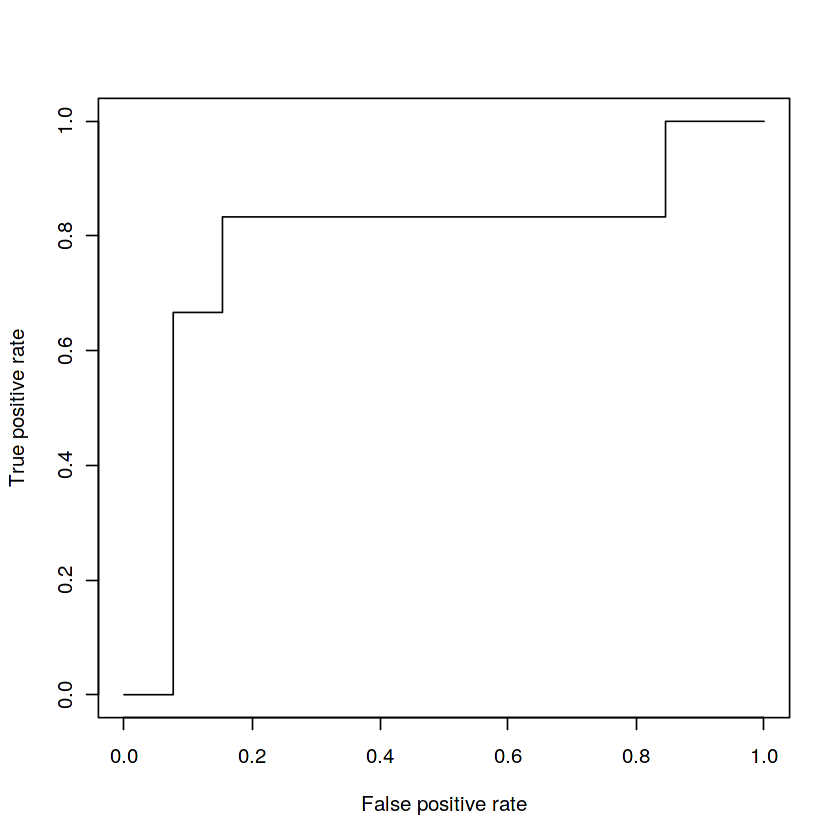

   
y   FALSE TRUE
  0    12    1
  1     3    3

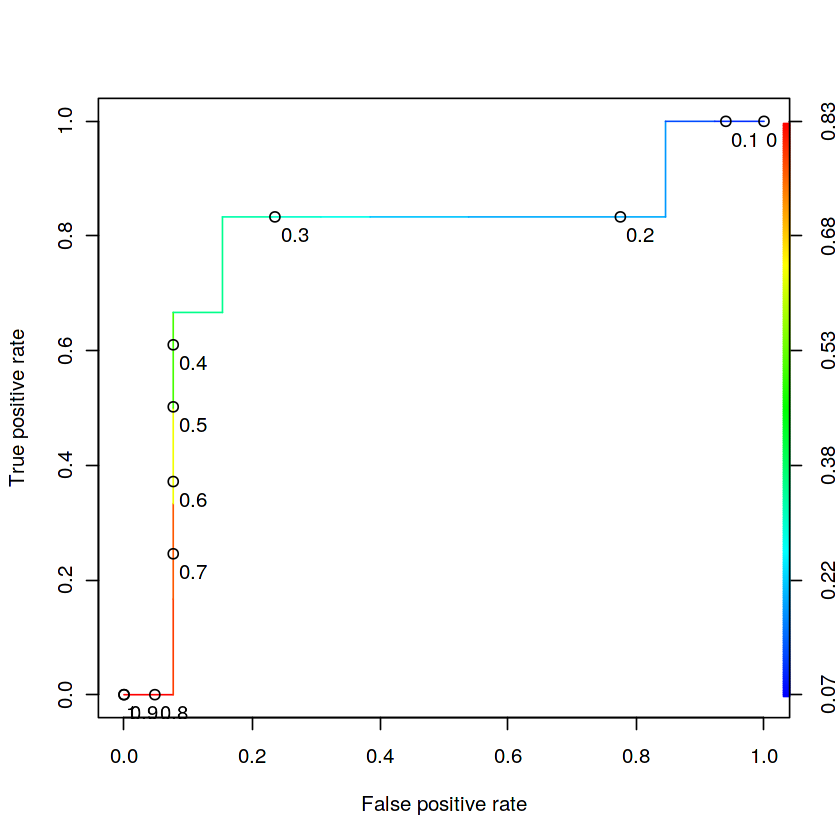

In [19]:
library(ROCR)
ROCRpred = prediction(predictTrain, y)
# Performance function
ROCRperf = performance(ROCRpred, "tpr", "fpr")
# Plot ROC curve
plot(ROCRperf)
# Add colors
plot(ROCRperf, colorize=TRUE)

plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))


# Confusion matrix for threshold of 0.5 for training set
table(y, predictTrain > 0.5)

#Making prediction on the test set
predictTest = predict(QualityLog, type = "response", newdata = datatest)
z=datatest$death
cm<-table(z,predictTest >= 0.3)

   
z   FALSE TRUE
  0     2    1
  1     1    1

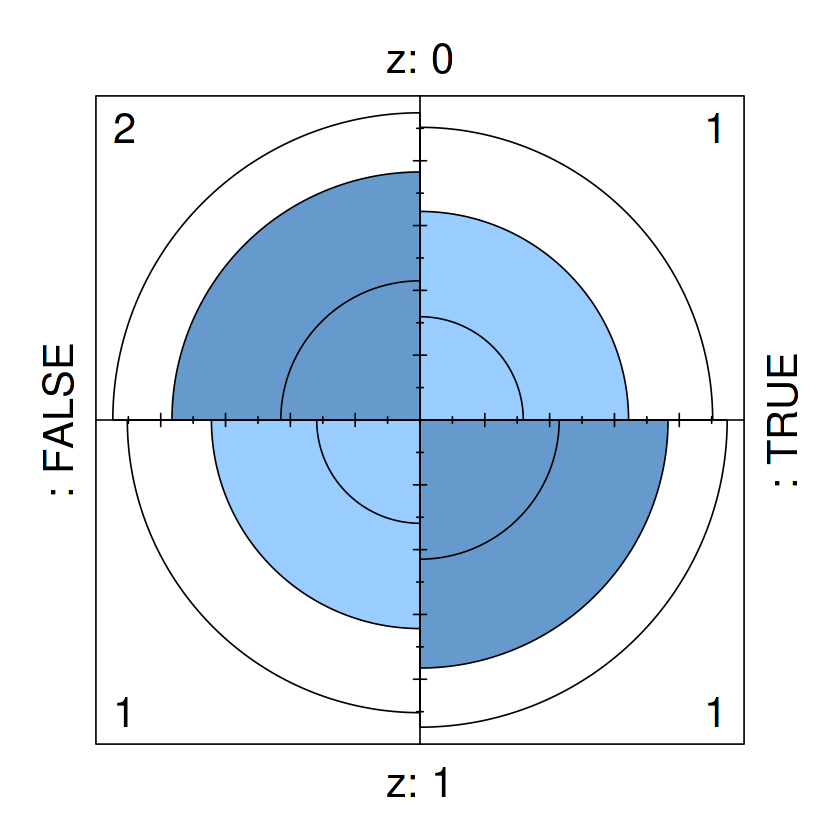

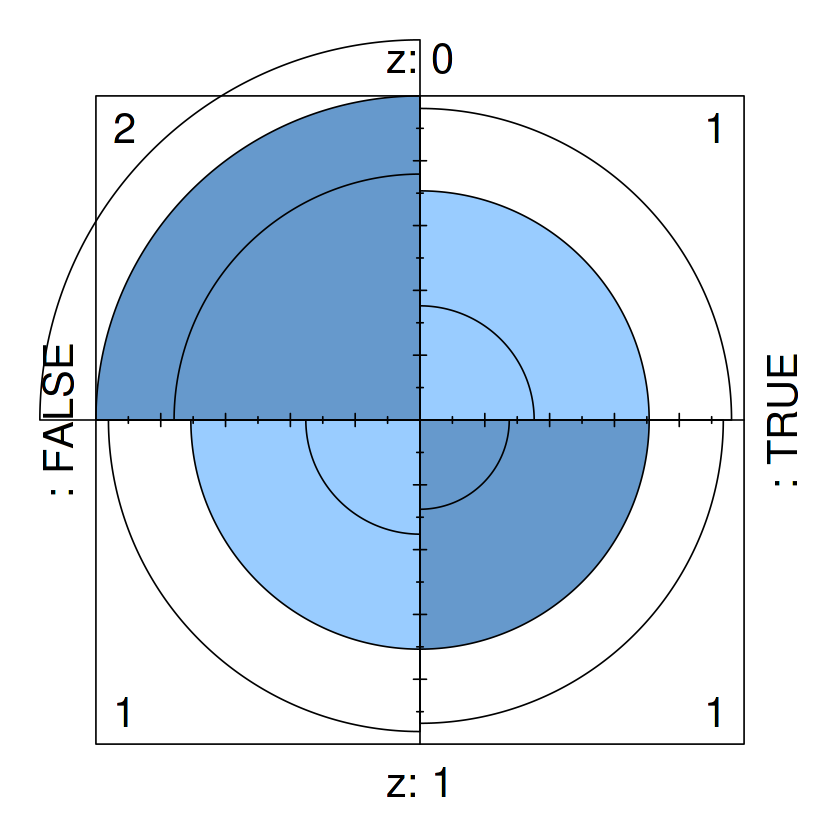

In [20]:
#plotting the confusion matrix
cm
fourfoldplot(cm)
fourfoldplot(cm, std = "all.max")

n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes

In [21]:
#Compute the Accuracy
accuracy = sum(diag) / n 
accuracy

[1] 0.6

In [22]:
#Compute the Precision
precision = diag / colsums 
precision

FALSE      TRUE 
0.6666667 0.5000000

In [23]:
#Compute the Sensitivity
recall = diag / rowsums 
recall

0         1 
0.6666667 0.5000000

In [24]:
#Compute the F Score
f1 = 2 * precision * recall / (precision + recall) 
f1

FALSE      TRUE 
0.6666667 0.5000000

In [25]:
#Computing the AUC
library(ROCR)
pred = prediction(predictTrain, y)
as.numeric(performance(pred, "auc")@y.values)

pred1 = prediction(predictTest, z)
as.numeric(performance(pred1, "auc")@y.values)

[1] 0.7820513

[1] 0.6666667

Setting levels: control = 0, case = 1

Setting direction: controls < cases



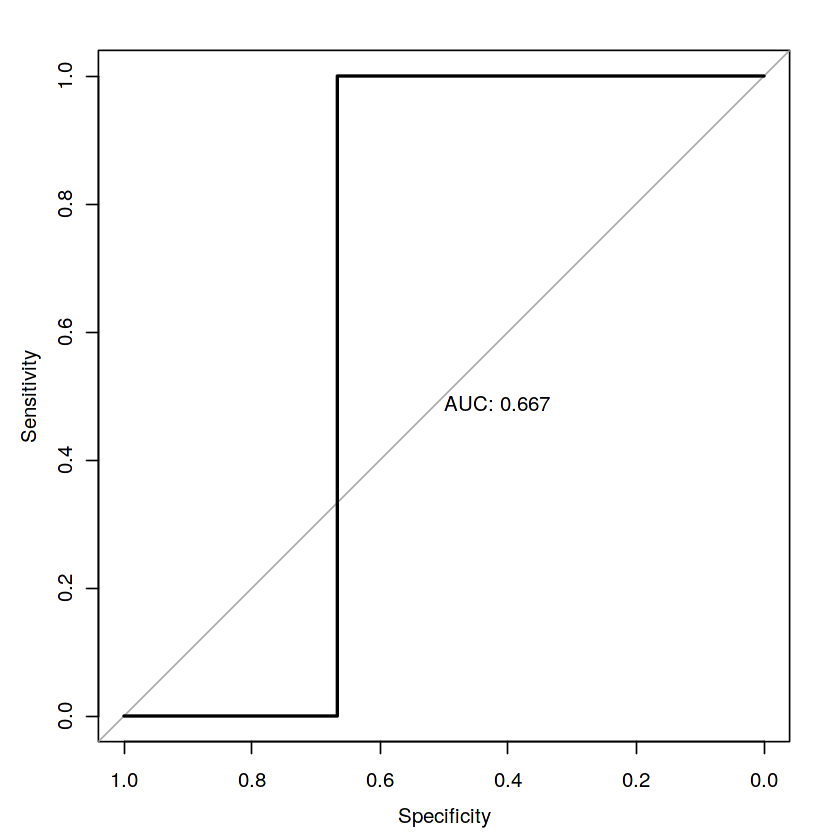

In [26]:
#Plotting the AUC
test_prob = predict(QualityLog, newdata = datatest, type = "response")
test_roc = roc(z ~ test_prob, plot = TRUE, print.auc = TRUE)

In [27]:
#Compute Pseudo R2s
PseudoR2(QualityLog, which="Efron")
PseudoR2(QualityLog, which="McFadden")
PseudoR2(QualityLog, which="CoxSnell")
PseudoR2(QualityLog, which="Nagelkerke")
PseudoR2(QualityLog, which="Tjur")

Efron 
0.1996836

McFadden 
0.1513042

CoxSnell 
0.1719843

Nagelkerke 
 0.2413059

Tjur 
0.1952255

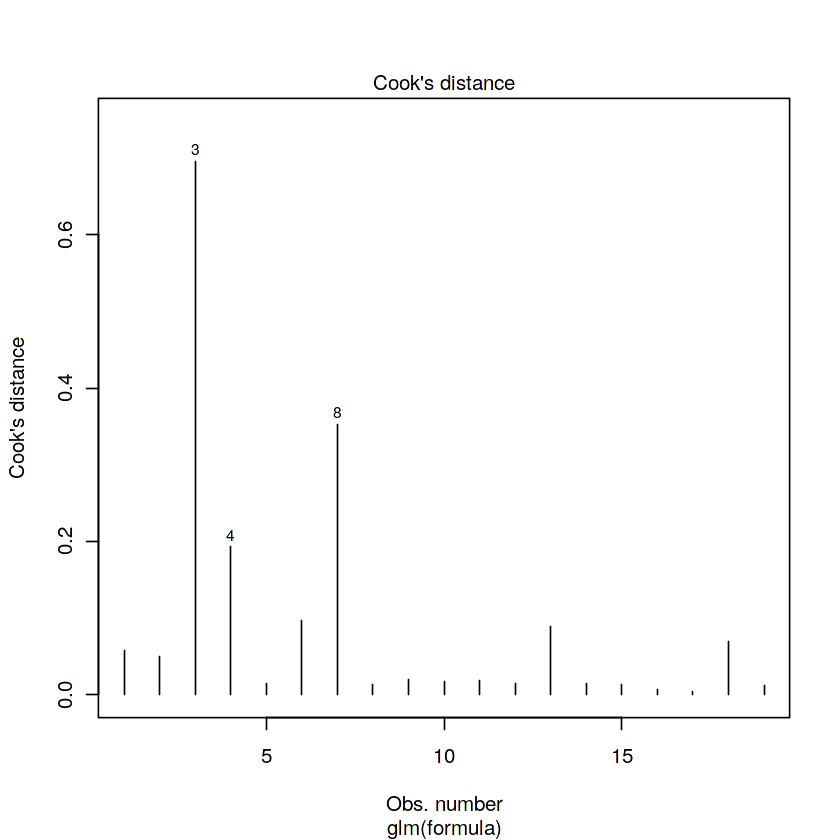

In [28]:
#Plotting Cook's Distance Plot
plot(QualityLog, which = 4, id.n = 3)

In [29]:
#Exploring Multicollinearity
model=lm(formula, data=data)
car::vif(model)

age   gender 
1.025033 1.025033

In [30]:
#Wald Test
library(car)
model=glm(formula, data=data)
Anova(model, type="II", test="Wald")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DescTools’:

    Recode


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
age,1,3.53779210,0.05998526
gender,1,0.08639985,0.76880489
